In [3]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the data-file
house_price = pd.read_csv(file_content_stream)
house_price.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
## Dropping No
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
from sklearn.model_selection import train_test_split

## Defining the input and target
X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = house_price['house_price_of_unit_area']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
from sklearn.linear_model import LinearRegression

## Building the linear model
lm_md = LinearRegression().fit(X_train, Y_train)

In [7]:
## Predicting on test 
lm_pred = lm_md.predict(X_test)
lm_pred

array([45.69729097, 30.41004132, 52.54468027, 40.51517653, 22.88982158,
       41.36507216, 12.62268661, 38.94334296, 52.52006023, 42.91073304,
       35.85721495, 41.88710229, 15.74203089, 48.77580163, 14.65789867,
       41.84130101, 51.89229827, 24.25313444, 43.45475368, 38.30589046,
       35.95917472, 37.23720537, 55.46875194, 43.77898619, 34.63684507,
       43.05555693, 45.84316044, 31.10555702, 34.09068996, 45.93595902,
       37.26629426, 41.36507216, 31.00792725, 41.36507216, 30.11340705,
       41.96096239, 41.89054108, 52.74164054, 38.72854182, 44.21490825,
       47.34579716, 47.57993764, 52.95865092, 32.07011768, 45.27071251,
       44.86676165, 33.00381275, 33.68678228, 33.73602235, 45.70113054,
       30.31156118, 43.66699791, 52.54468027, 34.84743995,  9.13142072,
       32.20325903, 50.00780524, 41.00107593, 42.98011052, 15.31919638,
       32.68737851, 47.57993764, 37.43633374, 43.16414084, 27.16775409,
       41.88710229, 33.24269441, 40.46202616, 33.73401507, 42.03

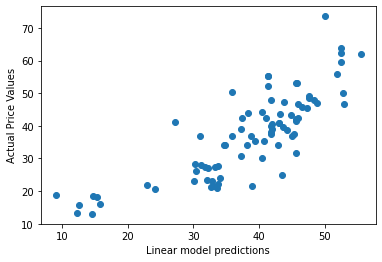

In [10]:
import matplotlib.pyplot as plt

plt.scatter(lm_pred, Y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual Price Values')
plt.show()

In [11]:
## Computing the mse
np.mean((Y_test - lm_pred)**2)

56.74819709969757